In [88]:
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import datetime
import pandas as pd

In [4]:
dir_path    = "../Sentinel1_Images_Beauvais"
files       = os.listdir(dir_path)
files[:4]

['14_08_17_vv.png', '01_04_17_vh.png', '13_10_17_vv.png', '14_08_17_vh.png']

In [81]:
df_beauvais = pd.DataFrame()
format = '%d/%m/%y'

dates = list()

for f in files:
    date        = "/".join(f.split("_")[:3])
    date_format = datetime.datetime.strptime(date, format)
    dates.append(date_format)

df_beauvais["Date"] = dates
df_beauvais = df_beauvais.drop_duplicates()
df_beauvais = df_beauvais.sort_values("Date")

df_beauvais.describe()

,Date
count,27
mean,2017-06-16 07:06:40
min,2017-01-01 00:00:00
25%,2017-03-12 12:00:00
50%,2017-05-16 00:00:00
75%,2017-09-20 12:00:00
max,2017-12-27 00:00:00


In [82]:
im_path = f'{dir_path}/{files[0]}'

im_try_vv = cv2.imread(im_path, cv2.COLOR_BGR2GRAY)

In [83]:
im_try_vv.shape

(377, 512, 3)

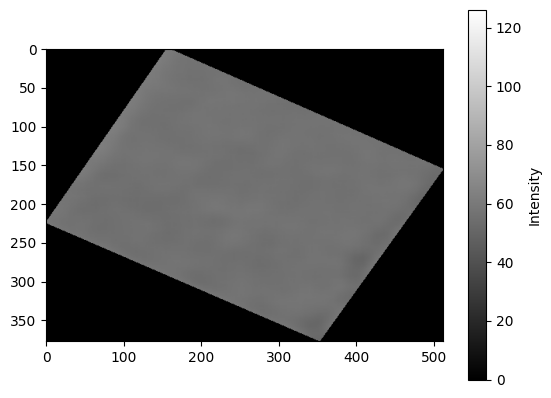

In [111]:
plt.imshow(im_try_vv, cmap="grey")
plt.colorbar(label="Intensity") 

In [112]:
def get_density(image):
    im_mean = image/255
    return im_mean[im_mean!=0].sum()

In [113]:
get_density(im_try_vv)

139289.24705882356

In [86]:
density_vv_list = list()
density_vh_list = list()

for d in df_beauvais["Date"]:

    string_date = d.strftime('%d_%m_%y')

    image_vv = f'{dir_path}/{string_date}_vv.png'
    image_vh = f'{dir_path}/{string_date}_vh.png'

    density_vv = get_density(cv2.imread(image_vv, cv2.COLOR_BGR2GRAY))
    density_vh = get_density(cv2.imread(image_vh, cv2.COLOR_BGR2GRAY))

    density_vv_list.append(density_vv)
    density_vh_list.append(density_vh)

df_beauvais["VV"] = density_vv_list
df_beauvais["VH"] = density_vh_list

In [107]:
df_beauvais.head()

,Date,VV,VH
15,2017-01-01,46429.74902,3163.827451
12,2017-01-16,46429.74902,3163.827451
38,2017-02-15,46429.74902,3163.827451
39,2017-03-02,46429.74902,3163.827451
20,2017-03-10,46429.74902,3163.827451


In [93]:
dates = df_beauvais["Date"]

cols_vv = df_beauvais["VV"]
cols_vh = df_beauvais["VH"]

<Axes: xlabel='Date', ylabel='VV'>

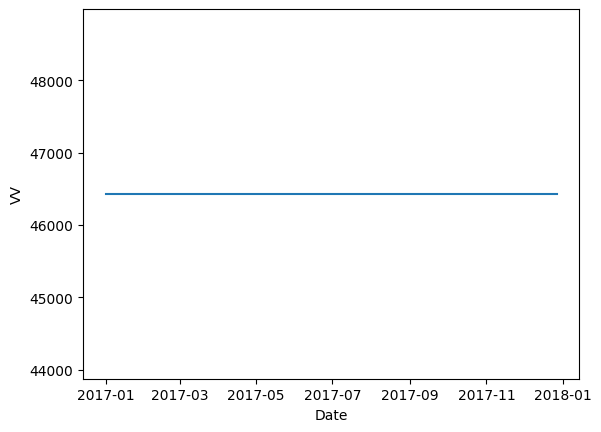

In [105]:
sns.lineplot(df_beauvais, x="Date", y="VV")